In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fact_df = pd.read_csv("cleaned-data/fact_table.csv")
store_df = pd.read_csv("cleaned-data/store_dim.csv")
time_df = pd.read_csv("cleaned-data/time_dim.csv")
item_df = pd.read_csv("cleaned-data/item_dim.csv",sep = ";", encoding='cp1252')
customer_df = pd.read_csv("cleaned-data/customer_dim.csv",sep = ";")
trans_df = pd.read_csv("cleaned-data/trans_dim.csv")

In [5]:
# fact table with the time the item was sold
merge_time_df = pd.merge(fact_df, time_df, on='time_key')
# fact table with the specific item description
fact_item_df = pd.merge(fact_df, item_df.drop(['unit_price', 'unit'], axis=1), on='item_key')
# fact table with the specific item description and the transaction details
fact_item_pay_df = pd.merge(fact_item_df, trans_df, on='payment_key')
# fact table with item description, transaction details, and the customer information
fact_item_pay_cust_df = pd.merge(fact_item_pay_df, customer_df, on='coustomer_key')

In [6]:
merged_data = pd.merge(
                merge_time_df, item_df.drop(['unit_price', 'unit'], axis=1), on='item_key'
            ).merge(
                trans_df, on='payment_key'
            ).merge(
                customer_df, on='coustomer_key'
            ).merge(
                store_df, on='store_key'
            )

In [98]:
merged_data.columns

Index(['payment_key', 'coustomer_key', 'time_key', 'item_key', 'store_key',
       'quantity', 'unit', 'unit_price', 'total_price', 'date', 'hour', 'day',
       'week', 'month', 'quarter', 'year', 'item_name', 'desc', 'man_country',
       'supplier', 'trans_type', 'bank_name', 'name', 'contact_no', 'nid',
       'division', 'district', 'upazila'],
      dtype='object')

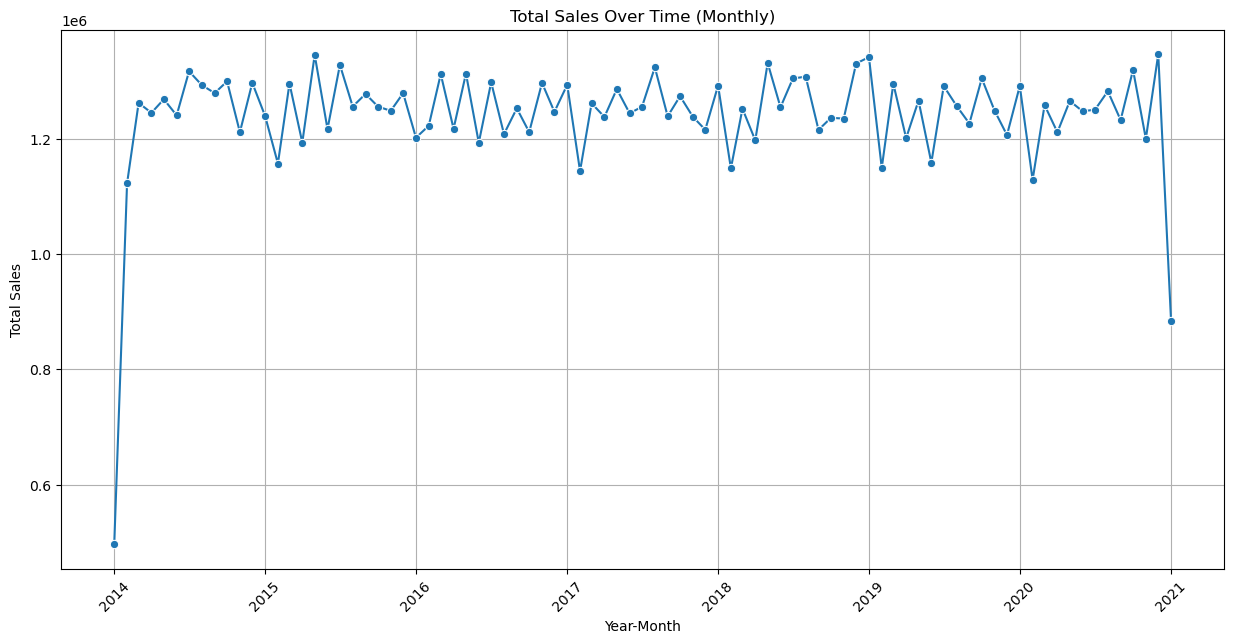

In [27]:
monthly_sales = merged_data.groupby(['year', 'month'])['total_price'].sum().reset_index()

monthly_sales['year_month'] = pd.to_datetime(monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str))

plt.figure(figsize=(15,7))
sns.lineplot(x='year_month', y='total_price', data=monthly_sales, marker='o')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.grid(True)
plt.show()

                                 item_name  total_price
206                          Red Bull 12oz    1305700.0
119    K Cups Daily Chef Columbian Supremo    1245394.0
123  K Cups Original Donut Shop Med. Roast    1188843.0
120      K Cups Dunkin Donuts Medium Roast    1109760.0
161    Muscle Milk Protein Shake Van. 11oz    1050924.0
121        K Cups Folgers Lively Columbian    1042406.0
114                        Honey Packets      1012995.0
124        K Cups Ã± Starbuck's Pike Place     995456.0
125       K Cups Ã±Organic Breakfast Blend     957516.0
118          K Cups - McCafe Premium Roast     956886.0


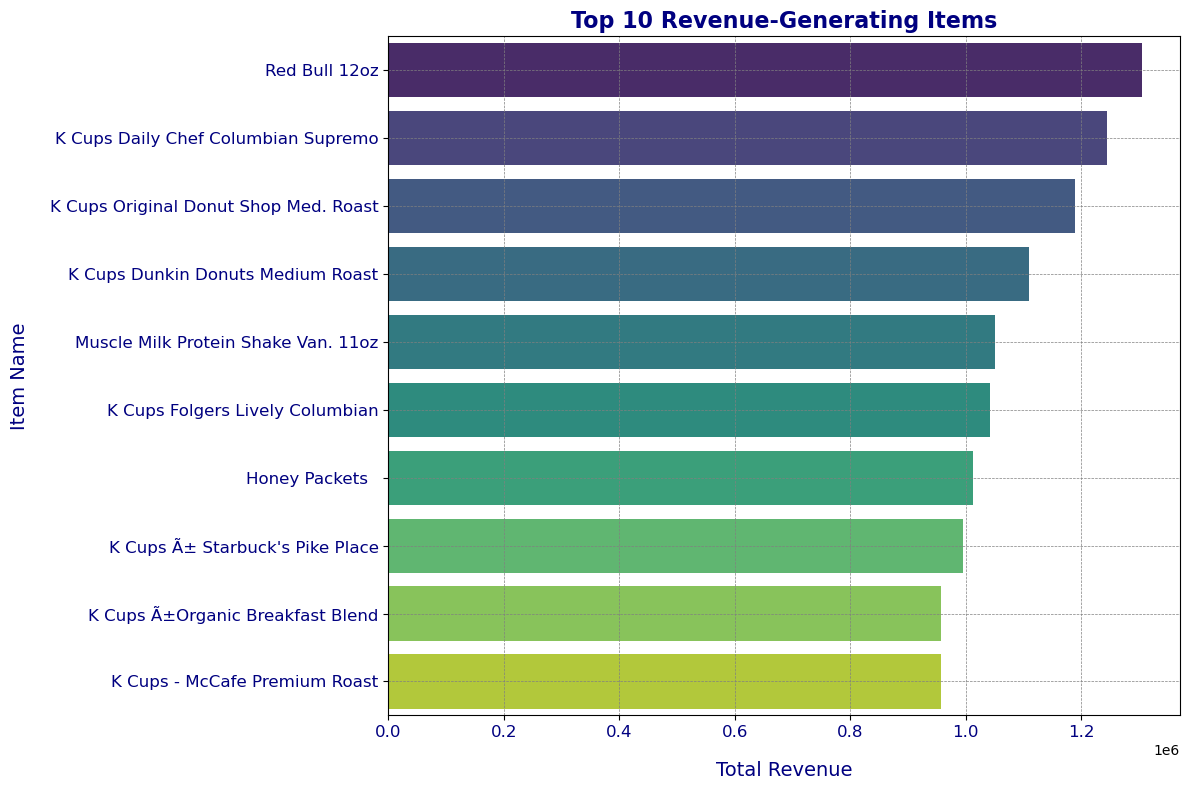

In [64]:
item_sales = merged_data.groupby('item_name')['total_price'].sum().reset_index()

top_items_by_sales = item_sales.sort_values(by='total_price', ascending=False)

print(top_items_by_sales.head(10))

top_items_by_sales = item_sales.sort_values(by='total_price', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='total_price', y='item_name', data=top_items_by_sales, palette='viridis')

plt.title('Top 10 Revenue-Generating Items', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Total Revenue', fontsize=14, labelpad=15, color='navy')
plt.ylabel('Item Name', fontsize=14, labelpad=15, color='navy')
plt.xticks(fontsize=12, color='navy')
plt.yticks(fontsize=12, color='navy')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()  
plt.show()

In [67]:
merged_data['division'].value_counts()

DHAKA         386888
CHITTAGONG    187340
RAJSHAHI      115075
KHULNA        107164
RANGPUR        79926
BARISAL        71444
SYLHET         52163
Name: division, dtype: int64

        division                              item_name  total_price
206      BARISAL                          Red Bull 12oz      95205.0
123      BARISAL  K Cups Original Donut Shop Med. Roast      86231.0
119      BARISAL    K Cups Daily Chef Columbian Supremo      83952.0
120      BARISAL      K Cups Dunkin Donuts Medium Roast      83376.0
121      BARISAL        K Cups Folgers Lively Columbian      76590.0
465   CHITTAGONG                          Red Bull 12oz     246510.0
378   CHITTAGONG    K Cups Daily Chef Columbian Supremo     235479.0
382   CHITTAGONG  K Cups Original Donut Shop Med. Roast     227370.0
420   CHITTAGONG    Muscle Milk Protein Shake Van. 11oz     202870.0
379   CHITTAGONG      K Cups Dunkin Donuts Medium Roast     201696.0
724        DHAKA                          Red Bull 12oz     510895.0
637        DHAKA    K Cups Daily Chef Columbian Supremo     474403.0
641        DHAKA  K Cups Original Donut Shop Med. Roast     470958.0
638        DHAKA      K Cups Dunki

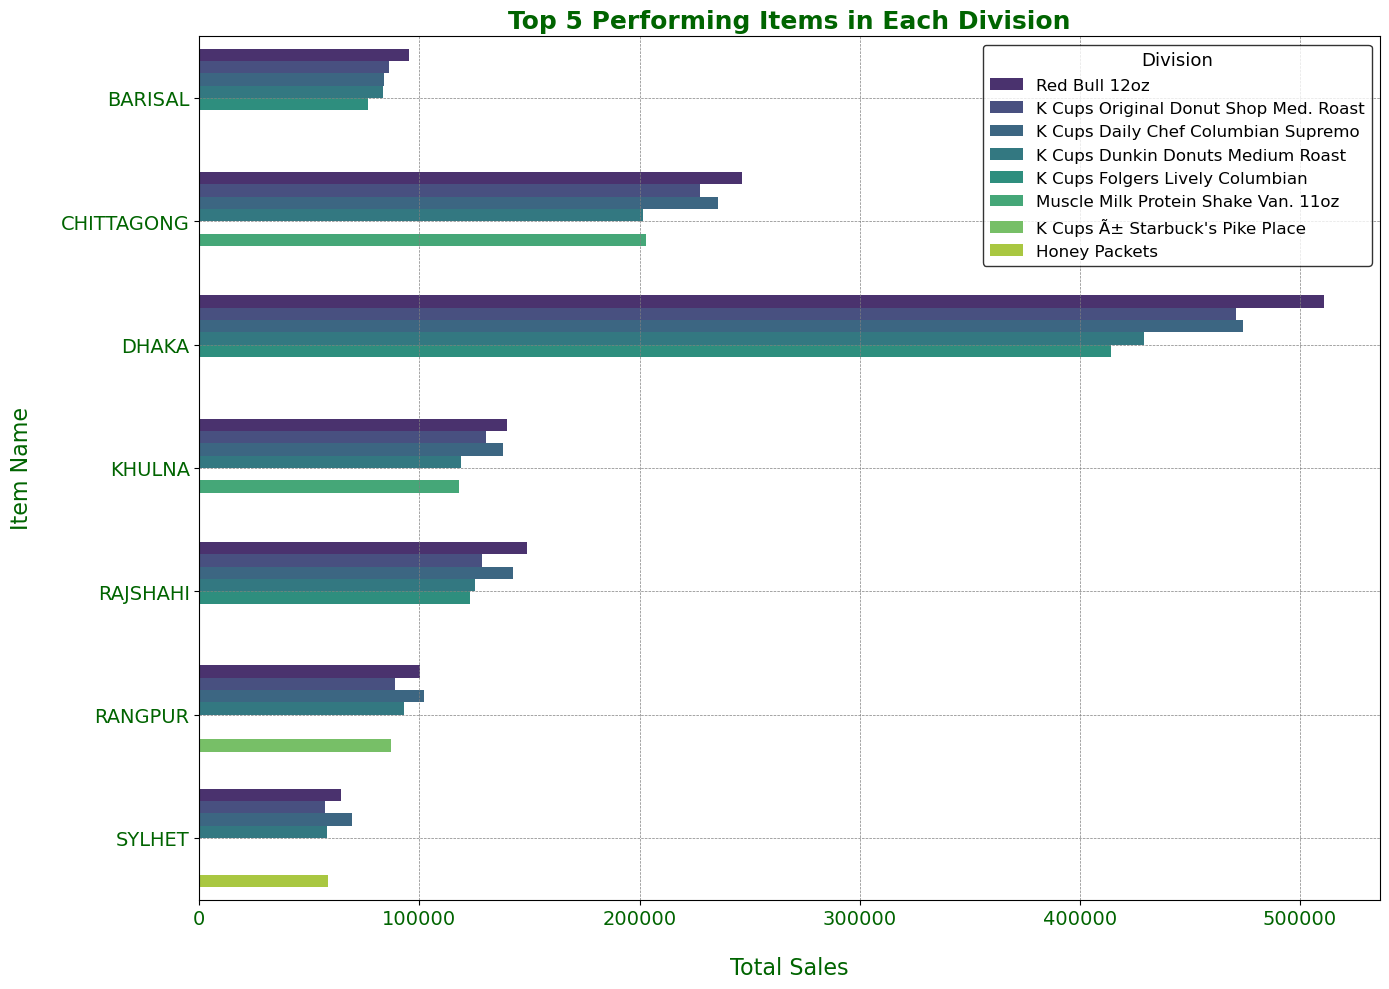

In [62]:
division_item_sales = merged_data.groupby(['division', 'item_name'])['total_price'].sum().reset_index()

# Sorting the items within each division by total sales in descending order
division_item_sales.sort_values(by=['division', 'total_price'], ascending=[True, False], inplace=True)

# Identifying the top 5 performing items in each division
top_5_items_in_division = division_item_sales.groupby('division').head(5)

# Displaying the top 5 performing items in each division
print(top_5_items_in_division)

# Creating a bar plot for top 5 items in each division with enhanced aesthetics
plt.figure(figsize=(14, 10))
sns.barplot(x='total_price', y='division', hue='item_name', data=top_5_items_in_division, palette='viridis')


plt.title('Top 5 Performing Items in Each Division', fontsize=18, fontweight='bold', color='darkgreen')
plt.xlabel('Total Sales', fontsize=16, labelpad=20, color='darkgreen')
plt.ylabel('Item Name', fontsize=16, labelpad=20, color='darkgreen')
plt.xticks(fontsize=14, color='darkgreen')
plt.yticks(fontsize=14, color='darkgreen')
plt.legend(title='Division', title_fontsize='13', fontsize='12', facecolor='white', edgecolor='black')

plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()  
plt.show()

In [78]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(monthly_sales['total_price'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -13.943720
p-value: 0.000000


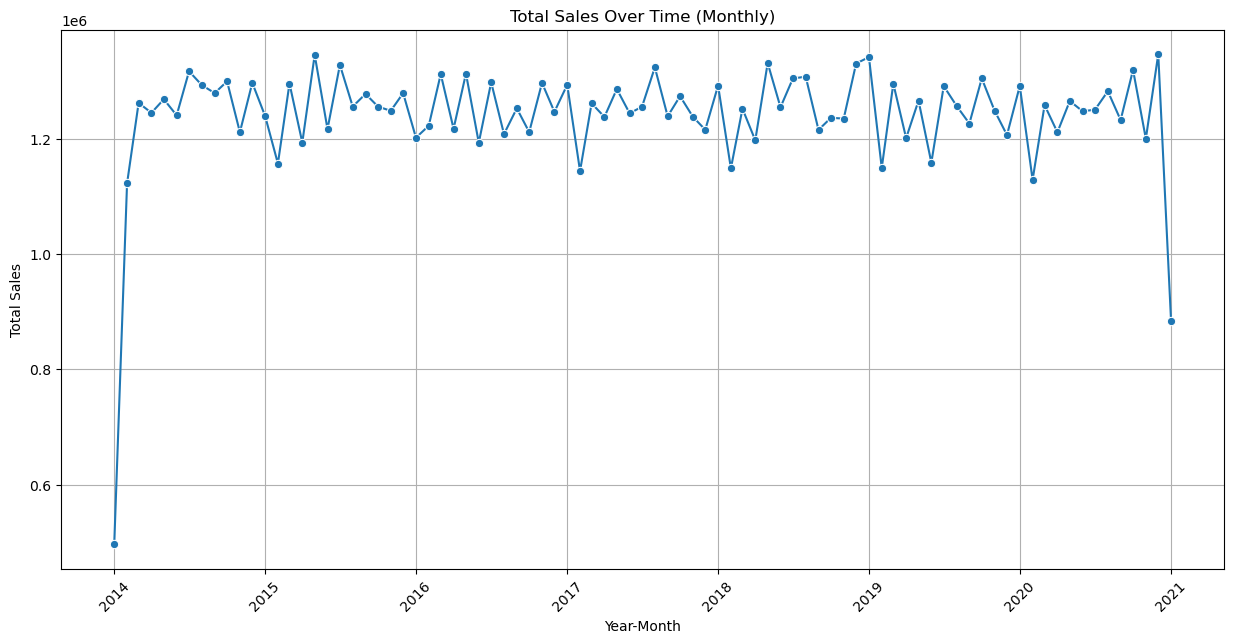

In [75]:
plt.figure(figsize=(15,7))
sns.lineplot(x='year_month', y='total_price', data=monthly_sales, marker='o')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()
#Common trend 

In [67]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly_sales['total_price'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.get_forecast(steps=10)

In [68]:
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[0:train_size], monthly_sales[train_size:len(monthly_sales)]

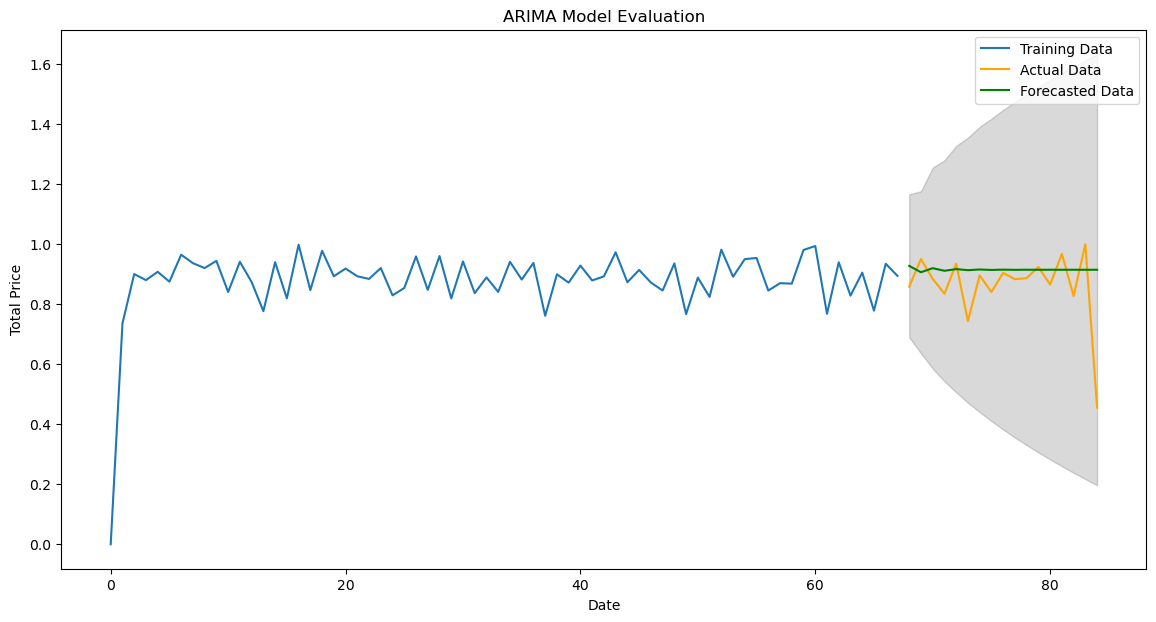

RMSE: 0.12883832649872326
Mean Absolute Percentage Error (MAPE): 11.867255472033284%


In [70]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[0:train_size], monthly_sales[train_size:len(monthly_sales)]

model_train = ARIMA(train['total_price'], order=(1, 1, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['total_price'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['total_price'], label='Training Data')
plt.plot(test['total_price'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.legend()
plt.show()

print('RMSE:', rmse)
mape = np.mean(np.abs((test['total_price'] - test_forecast_series) / test['total_price'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


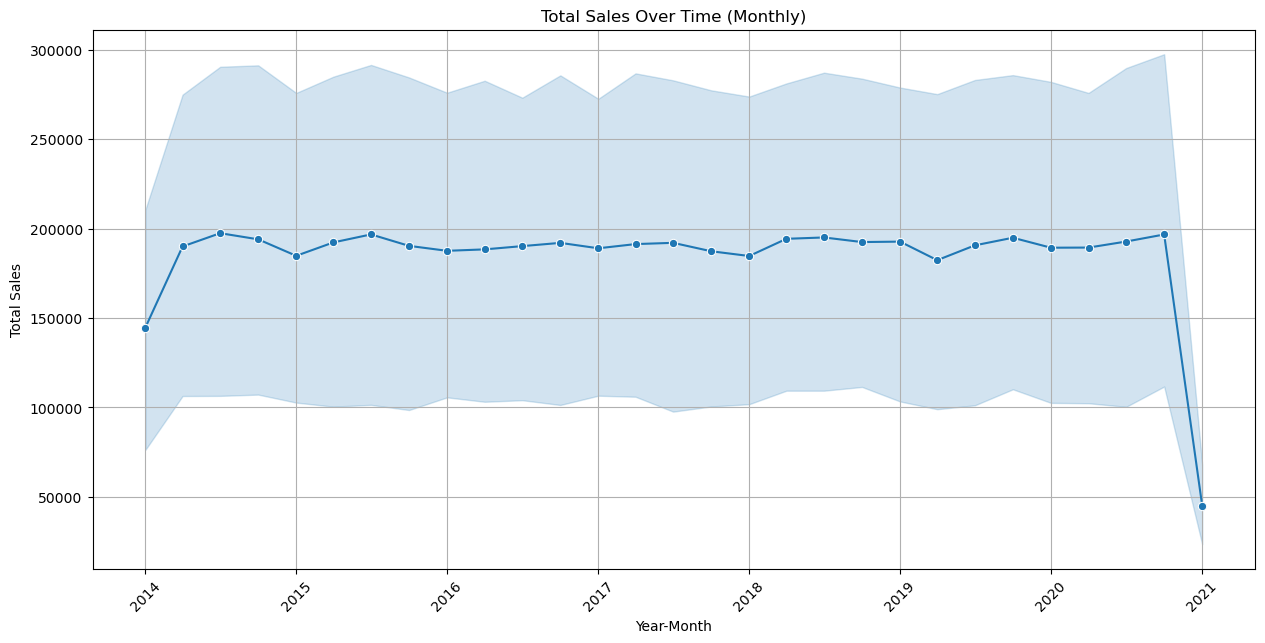

In [137]:
#Graph only with Food category
monthly_sales = merged_data.groupby(['year', 'quarter', 'desc'])['total_price'].sum().reset_index()
monthly_sales = monthly_sales[monthly_sales.desc.str.contains('Food')]
monthly_sales['year_month'] = pd.to_datetime(monthly_sales['year'].astype(str) + '-' + monthly_sales['quarter'].astype(str))

plt.figure(figsize=(15,7))
sns.lineplot(x='year_month', y='total_price', data=monthly_sales, marker='o')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

## Looking Forward...
* Quarter is better than monthly bases in terms of business trend
  - Maybe normalization would help?
* Try running ARIMA on one division only, find the trend
* Try running ARIMA on one category (desc)
* Honey Packet - While it one of the top sales, why is it only sold in one of the divisions?

## Prediction by quarter

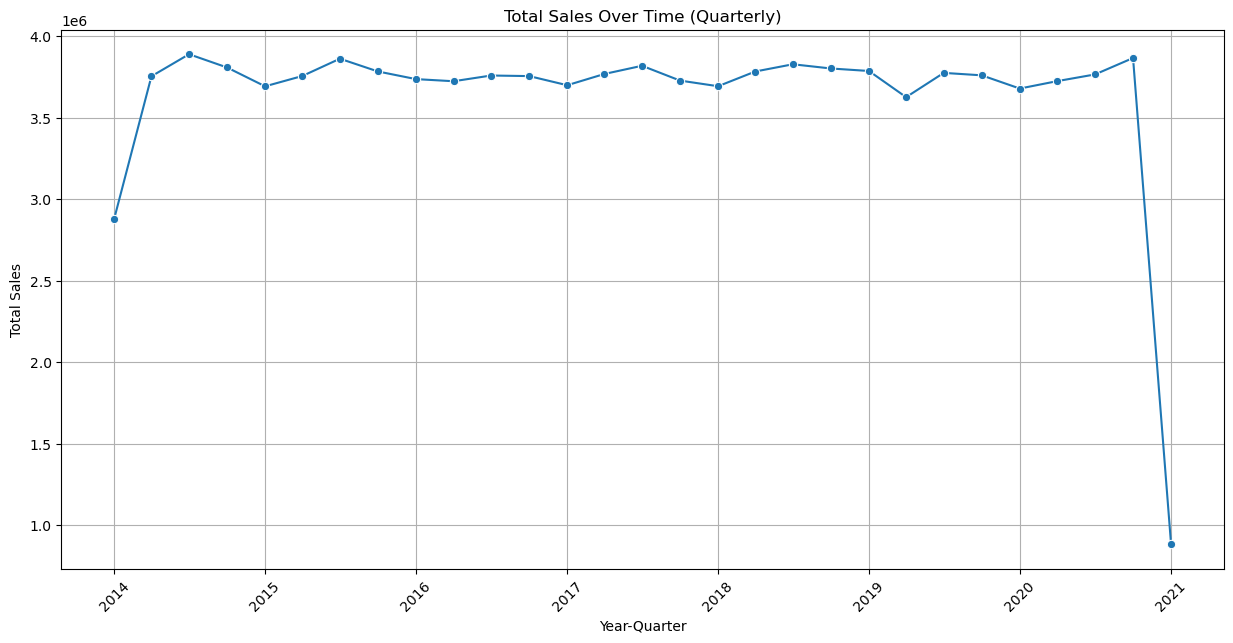

In [8]:
quarterly_sales = merged_data.groupby(['year', 'quarter'])['total_price'].sum().reset_index()

quarterly_sales['year_quarter'] = pd.to_datetime(quarterly_sales['year'].astype(str) + '-' + quarterly_sales['quarter'].astype(str))

plt.figure(figsize=(15,7))
sns.lineplot(x='year_quarter', y='total_price', data=quarterly_sales, marker='o')
plt.title('Total Sales Over Time (Quarterly)')
plt.xlabel('Year-Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.grid(True)
plt.show()

C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


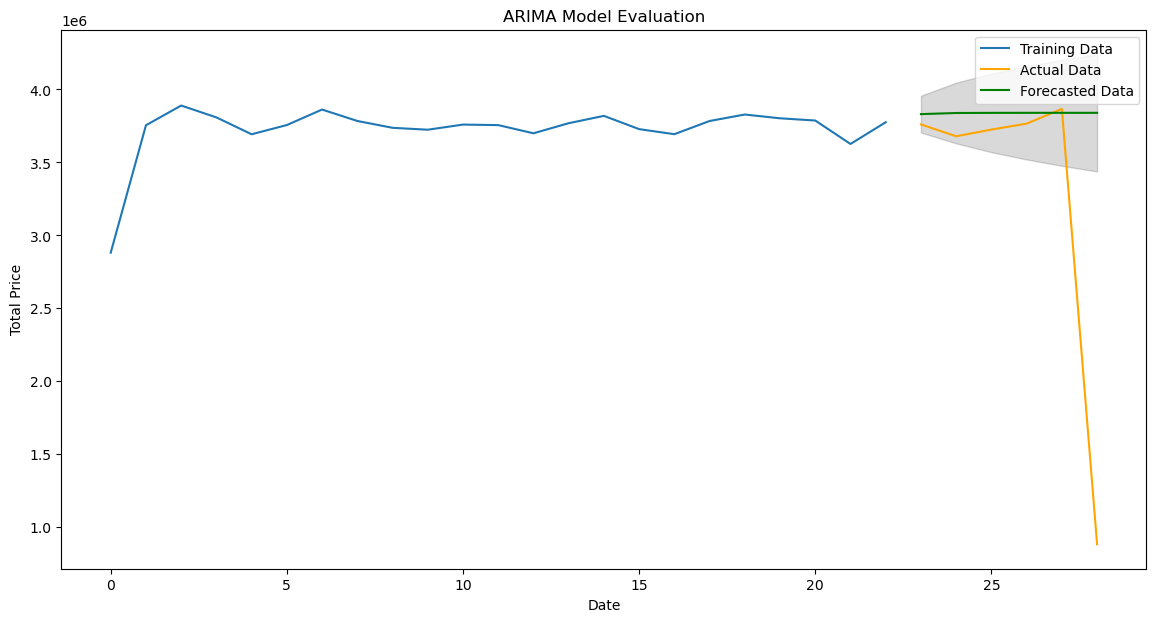

RMSE: 1210234.5181605164


In [10]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(quarterly_sales) * 0.8)
train, test = quarterly_sales[0:train_size], quarterly_sales[train_size:len(quarterly_sales)]

model_train = ARIMA(train['total_price'], order=(1, 1, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['total_price'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['total_price'], label='Training Data')
plt.plot(test['total_price'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.legend()
plt.show()

print('RMSE:', rmse)

## Trend prediction by each division

C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


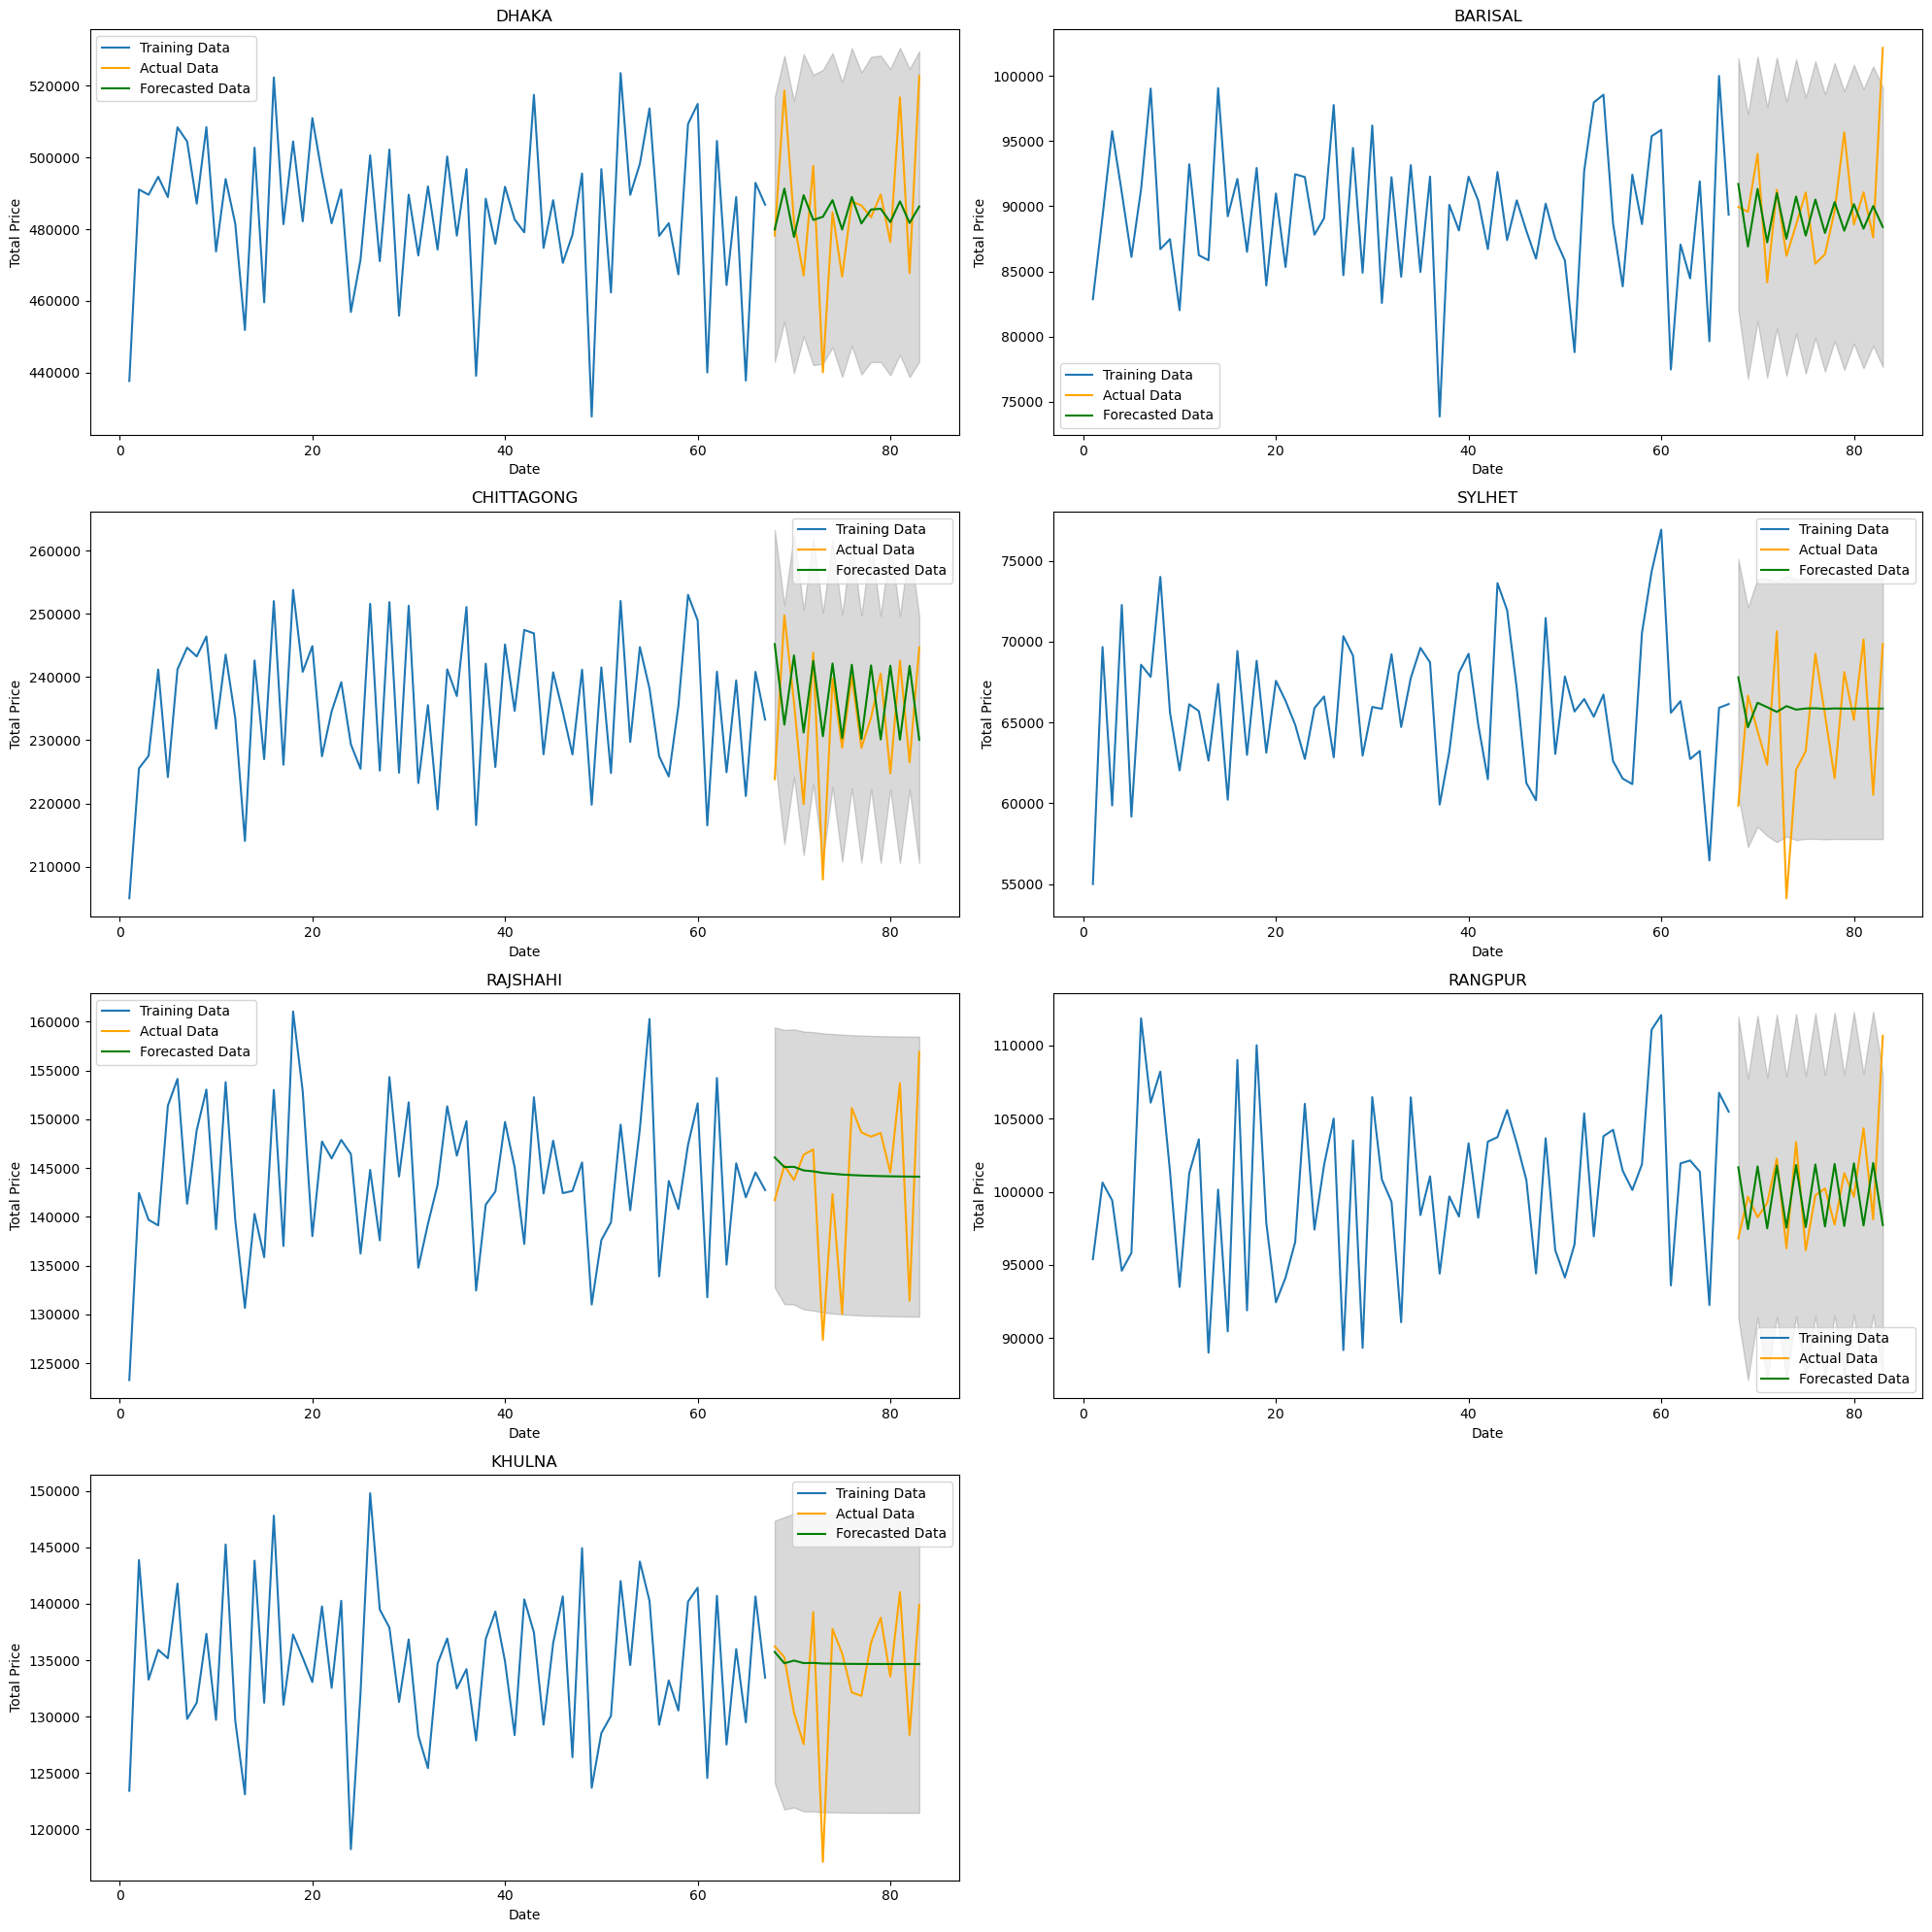

DHAKA - RMSE: 2.939823102507086
DHAKA - MAPE: 5895.106589077223%
BARISAL - RMSE: 3.5406828730588273
BARISAL - MAPE: 5895.106589077223%
CHITTAGONG - RMSE: 4.536393340961474
CHITTAGONG - MAPE: 5895.106589077223%
SYLHET - RMSE: 6.3293697751175495
SYLHET - MAPE: 5895.106589077223%
RAJSHAHI - RMSE: 4.383439991708459
RAJSHAHI - MAPE: 5895.106589077223%
RANGPUR - RMSE: 3.4037868691623645
RANGPUR - MAPE: 5895.106589077223%
KHULNA - RMSE: 3.3409456725635485
KHULNA - MAPE: 5895.106589077223%


In [74]:
div = {k:merged_data[merged_data.division == k].groupby(['year', 'month'])['total_price'].sum().reset_index() for k in ['DHAKA', 'BARISAL', 'CHITTAGONG', 'SYLHET', 'RAJSHAHI', 'RANGPUR',
       'KHULNA']}

def apply_arima_plot(ax, df, title):
    train_size = int(len(df) * 0.8)
    train, test = df[1:train_size], df[train_size:len(df)-1]

    model_train = ARIMA(train['total_price'], order=(2,0,2))
    model_train_fit = model_train.fit()

    # Forecast on the test dataset
    test_forecast = model_train_fit.get_forecast(steps=len(test))
    test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

    # Calculate the mean squared error
    mse = mean_squared_error(test['total_price'], test_forecast_series)
    rmse = mse**0.5
    mape = np.mean(np.abs((test['total_price'] - test_forecast_series) / test['total_price'])) * 100

    # Plotting
    ax.plot(train['total_price'], label='Training Data')
    ax.plot(test['total_price'], label='Actual Data', color='orange')
    ax.plot(test_forecast_series, label='Forecasted Data', color='green')
    ax.fill_between(test.index, 
                    test_forecast.conf_int().iloc[:, 0], 
                    test_forecast.conf_int().iloc[:, 1], 
                    color='k', alpha=.15)
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Price')
    ax.legend()
    return rmse, mape

# Create a figure with 7 subplots arranged in a grid
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

# Hide the empty subplot (8th subplot)
fig.delaxes(axs[3][1])

# Apply ARIMA model and plot to each dataframe in the dictionary
rmses = []
mapes = []
for i, (title, df) in enumerate(div.items()):
    row, col = divmod(i, 2)
    mape, rmse = apply_arima_plot(axs[row, col], df, title)
    mapes.append((title, mape))
    rmses.append((title, rmse))

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Print RMSE values
for title, rmse in rmses:
    print(f'{title} - RMSE:', rmse)
    print(f'{title} - MAPE: {mape}%')

### By each category

C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


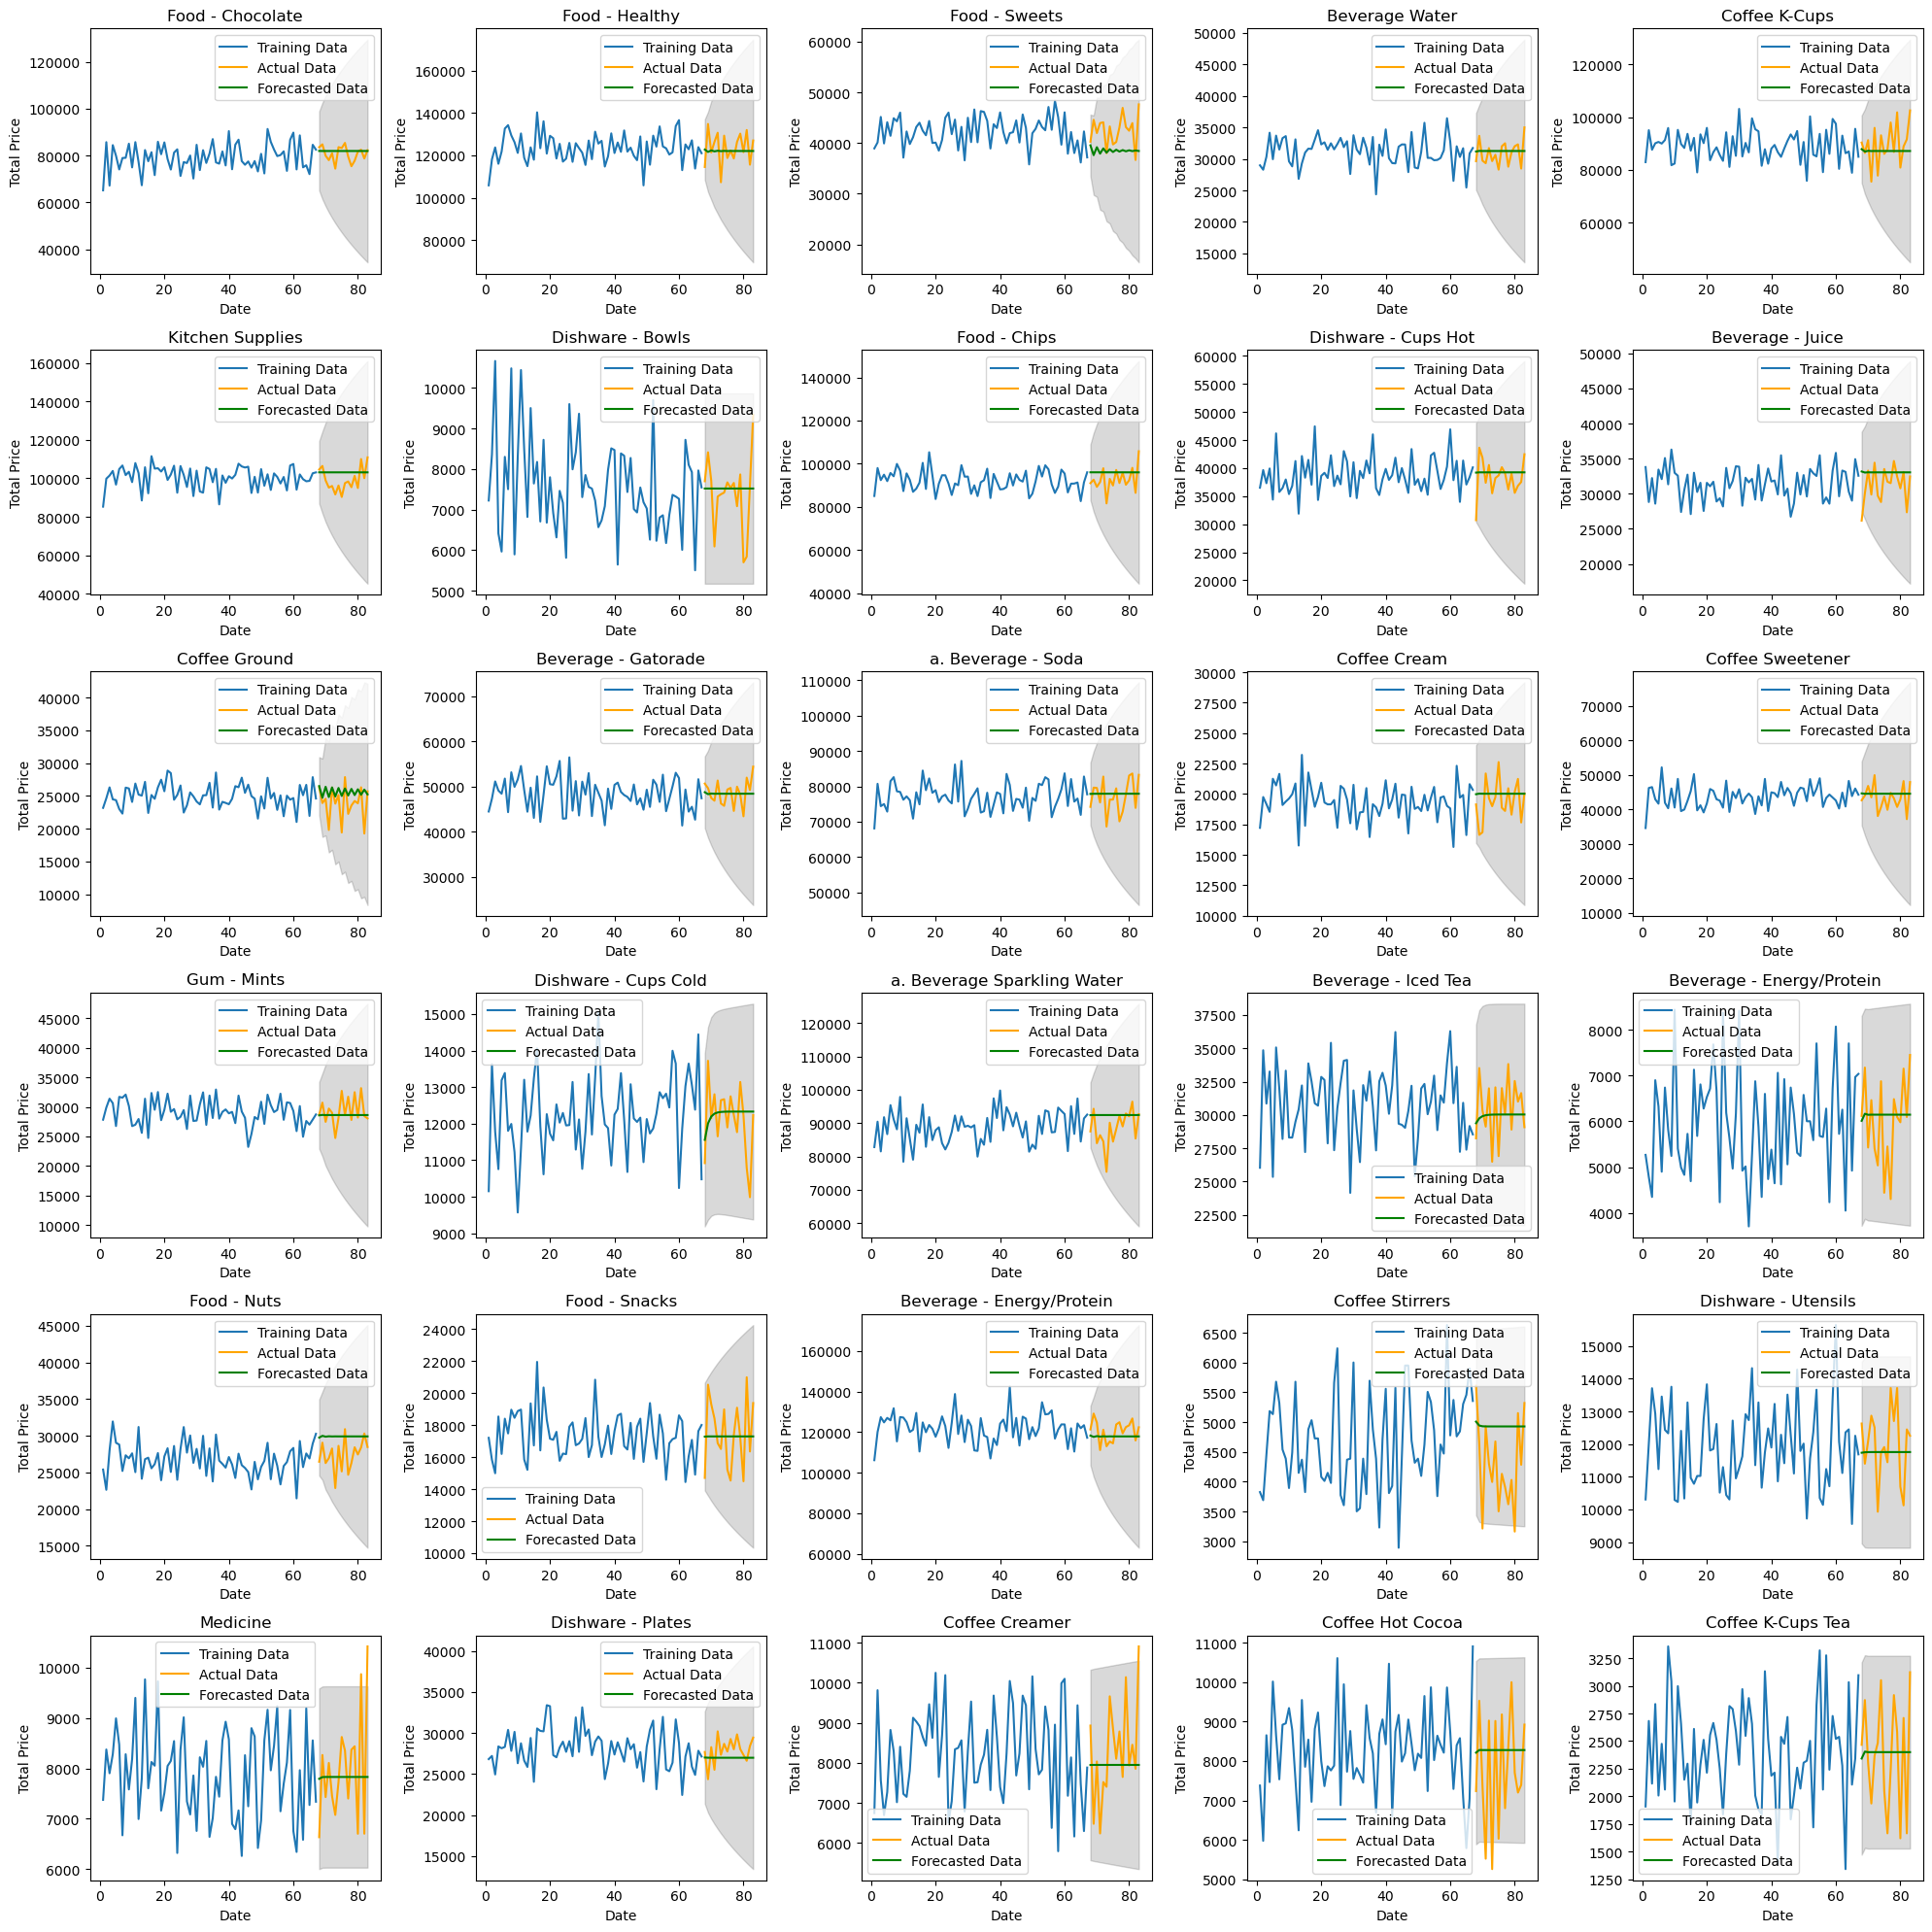

Food - Chocolate - RMSE: 3349.988936504746
Food - Healthy - RMSE: 7383.679761083464
Food - Sweets - RMSE: 4960.228740821998
Beverage Water - RMSE: 1901.5816784613721
Coffee K-Cups - RMSE: 7871.818326382734
Kitchen Supplies - RMSE: 7010.28066822659
Dishware - Bowls - RMSE: 894.3594213098518
Food - Chips - RMSE: 6244.465782236333
Dishware - Cups Hot - RMSE: 3170.5720818021955
Beverage - Juice - RMSE: 2998.290956112157
Coffee Ground - RMSE: 2868.526502506962
Beverage - Gatorade - RMSE: 2768.0541975865654
a. Beverage - Soda - RMSE: 4565.414212707103
Coffee Cream - RMSE: 1706.6289421580125
Coffee Sweetener - RMSE: 3681.844151405697
Gum - Mints - RMSE: 2310.493678787304
Dishware - Cups Cold - RMSE: 917.5022737594969
a. Beverage Sparkling Water - RMSE: 6393.359104992363
Beverage - Iced Tea - RMSE: 2193.931702140646
Beverage - Energy/Protein  - RMSE: 922.8076945179491
Food - Nuts - RMSE: 3204.879990271601
Food - Snacks - RMSE: 2061.083932552824
Beverage - Energy/Protein - RMSE: 5709.8255262718

In [75]:
div = {k:merged_data[merged_data.desc == k].groupby(['year', 'month'])['total_price'].sum().reset_index() for k in merged_data.desc.unique()}

def apply_arima_plot(ax, df, title):
    train_size = int(len(df) * 0.8)
    train, test = df[1:train_size], df[train_size:len(df)-1]

    model_train = ARIMA(train['total_price'], order=(1, 1, 1))
    model_train_fit = model_train.fit()

    # Forecast on the test dataset
    test_forecast = model_train_fit.get_forecast(steps=len(test))
    test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

    # Calculate the mean squared error
    mse = mean_squared_error(test['total_price'], test_forecast_series)
    rmse = mse**0.5

    # Plotting
    ax.plot(train['total_price'], label='Training Data')
    ax.plot(test['total_price'], label='Actual Data', color='orange')
    ax.plot(test_forecast_series, label='Forecasted Data', color='green')
    ax.fill_between(test.index, 
                    test_forecast.conf_int().iloc[:, 0], 
                    test_forecast.conf_int().iloc[:, 1], 
                    color='k', alpha=.15)
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Price')
    ax.legend()
    return rmse

# Create a figure with 7 subplots arranged in a grid
fig, axs = plt.subplots(6, 5, figsize=(20, 20))


# Apply ARIMA model and plot to each dataframe in the dictionary
rmses = []
for i, (title, df) in enumerate(div.items()):
    row, col = divmod(i, 5)
    rmse = apply_arima_plot(axs[row, col], df, title)
    rmses.append((title, rmse))

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Print RMSE values
for title, rmse in rmses:
    print(f'{title} - RMSE:', rmse)

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load the data with correct parsing
file_path = '/mnt/data/monthly_sales.csv'  # Update with your actual file path
data = monthly_sales

# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['total_price'].values.reshape(-1, 1))

def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 12  # Using 12 months to predict the next month's sales
X, y = create_dataset(scaled_data, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print('Train Score: %.2f RMSE' % (train_score))
print('Test Score: %.2f RMSE' % (test_score))

# Plot baseline and predictions
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(scaled_data)-1, :] = test_predict

plt.figure(figsize=(14, 7))
plt.plot(data['total_price'], label='Actual Data')
plt.plot(data.index, train_predict_plot, label='Train Predict', color='orange')
plt.plot(data.index, test_predict_plot, label='Test Predict', color='green')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.title('LSTM Model Evaluation')
plt.legend()
plt.show()


Epoch 1/20


C:\Users\lucas\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 - 7s - 123ms/step - loss: 0.0905
Epoch 2/20
57/57 - 0s - 7ms/step - loss: 0.0054
Epoch 3/20
57/57 - 1s - 14ms/step - loss: 0.0057
Epoch 4/20
57/57 - 1s - 9ms/step - loss: 0.0060
Epoch 5/20
57/57 - 0s - 7ms/step - loss: 0.0050
Epoch 6/20
57/57 - 0s - 6ms/step - loss: 0.0048
Epoch 7/20
57/57 - 0s - 6ms/step - loss: 0.0059
Epoch 8/20
57/57 - 0s - 9ms/step - loss: 0.0062
Epoch 9/20
57/57 - 0s - 6ms/step - loss: 0.0045
Epoch 10/20
57/57 - 0s - 7ms/step - loss: 0.0056
Epoch 11/20
57/57 - 1s - 12ms/step - loss: 0.0043
Epoch 12/20
57/57 - 0s - 7ms/step - loss: 0.0053
Epoch 13/20
57/57 - 0s - 7ms/step - loss: 0.0043
Epoch 14/20
57/57 - 0s - 7ms/step - loss: 0.0058
Epoch 15/20
57/57 - 0s - 7ms/step - loss: 0.0056
Epoch 16/20
57/57 - 0s - 7ms/step - loss: 0.0049
Epoch 17/20
57/57 - 0s - 7ms/step - loss: 0.0048
Epoch 18/20
57/57 - 0s - 7ms/step - loss: 0.0048
Epoch 19/20
57/57 - 0s - 6ms/step - loss: 0.0055
Epoch 20/20
57/57 - 0s - 8ms/step - loss: 0.0048
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/st

ValueError: could not broadcast input array from shape (15,1) into shape (2,1)

In [65]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the data
data = monthly_sales

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Define the range for p, d, q
p = d = q = range(0, 3)

# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

# Function to evaluate ARIMA model for a given order
def evaluate_arima_order(train, test, arima_order):
    model = ARIMA(train['total_price'], order=arima_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    mse = mean_squared_error(test['total_price'], forecast)
    return mse

# Find the optimal order
best_score, best_order = float("inf"), None
for order in pdq:
    try:
        mse = evaluate_arima_order(train, test, order)
        if mse < best_score:
            best_score, best_order = mse, order
    except Exception as e:
        continue

print(f'Best ARIMA order: {best_order} with RMSE: {np.sqrt(best_score)}')

C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lucas\anaconda3\Lib\site-packa

Best ARIMA order: (2, 0, 2) with RMSE: 0.11650722513429053
